## PROBLEM 6

In [10]:
import json
import newspaper
import nltk
import spacy
from collections import Counter 
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [11]:
# Gets ABC links and text

abcnews = []
for line in open('RISJbot-master/jsonloutput/abc/2021-02-26T02-25-50-abc.jsonl', 'r'):
    abcnews.append(json.loads(line))

abclinks = []

for story in abcnews:
    abclinks.append(story['url'])

print(len(abclinks))

78


In [12]:
# Gets more ABC links and text

abcnews2 = []
for line in open('RISJbot-master/jsonloutput/abc/2021-02-26T14-10-20-abc.jsonl', 'r'):
    abcnews2.append(json.loads(line))

abclinks2 = []

for story in abcnews2:
    abclinks2.append(story['url'])

print(len(abclinks2))

80


In [13]:
# Gets even more ABC links and text

abcnews3 = []
for line in open('RISJbot-master/jsonloutput/abc/2021-02-26T01-50-02-abc.jsonl', 'r'):
    abcnews3.append(json.loads(line))

abclinks3 = []

for story in abcnews3:
    abclinks3.append(story['url'])

print(len(abclinks3))

78


In [15]:
# Concatenates all of the ABC data into one variable

for link in abclinks2:
    if link not in abclinks:
        abclinks.append(link)
        
for link in abclinks3:
    if link not in abclinks:
        abclinks.append(link)

print(len(abclinks))



103


In [16]:
# Gets FOX links and text

foxnews = []
for line in open('RISJbot-master/jsonloutput/foxnews/2021-02-26T01-50-48-foxnews.jsonl', 'r'):
    foxnews.append(json.loads(line))

foxlinks = []

for story in foxnews:
    foxlinks.append(story['url'])
    
print(len(foxlinks))

421


## 6.1

In [17]:
# Get article text for Fox with newspaper
foxtext = []

for link in foxlinks[0:100]:
    if link != "":
        article_name = newspaper.Article(link, language="en")
        article_name.download()
        article_name.parse()
        foxtext.append(article_name.text)


In [23]:
# Get article text for ABC with newspaper
abctext = []

for link in abclinks:
    if link != "":
        article_name = newspaper.Article(link, language="en")
        article_name.download()
        article_name.parse()
        abctext.append(article_name.text)

In [18]:
# Preprocess Fox text

fox_tokens = []
punct_list = []

sp = spacy.load("en_core_web_sm")
all_stopwords = sp.Defaults.stop_words


for punct in string.punctuation:
    punct_list.append(punct)

punct_list += ['``', "''", "’", '--', 's', 't', '–', '‘']


for article in foxtext:
    article_sent = nltk.tokenize.sent_tokenize(article)
    for sent in article_sent:
        article_word = nltk.tokenize.word_tokenize(sent)
        for word in article_word:
            if word.lower() not in all_stopwords and word.lower() not in punct_list:
                fox_tokens.append(word.lower())


fox_word_count = Counter(fox_tokens)

In [24]:
# Preprocess ABC text

abc_tokens = []

for article in abctext:
    article_sent = nltk.tokenize.sent_tokenize(article)
    for sent in article_sent:
        article_word = nltk.tokenize.word_tokenize(sent)
        for word in article_word:
            if word.lower() not in all_stopwords and word.lower() not in punct_list:
                abc_tokens.append(word.lower())


abc_word_count = Counter(abc_tokens)

In [31]:
# Make lists of how #tokens and #word types change as you iterate over the Fox text

fox_num_tokens = range(len(fox_tokens))
fox_num_types = []
fox_found_words = []
fox_type_count = 0
for word in fox_tokens:
    if word not in fox_found_words:
        fox_type_count += 1
        fox_found_words.append(word)
    fox_num_types.append(fox_type_count)


Text(0.5, 1.0, 'Fox News #Word Types vs #Tokens')

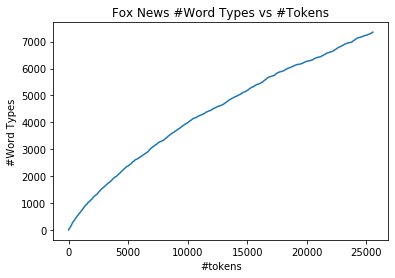

In [32]:
plt.plot(fox_num_tokens, fox_num_types)
plt.xlabel("#tokens")
plt.ylabel("#Word Types")
plt.title("Fox News #Word Types vs #Tokens")

In [35]:
# Make lists of how #tokens and #word types change as you iterate over the Fox text

abc_num_tokens = range(len(abc_tokens))
abc_num_types = []
abc_found_words = []
abc_type_count = 0
for word in abc_tokens:
    if word not in abc_found_words:
        abc_type_count += 1
        abc_found_words.append(word)
    abc_num_types.append(abc_type_count)
        
# print(num_types)

Text(0.5, 1.0, 'ABC News #Word Types vs #Tokens')

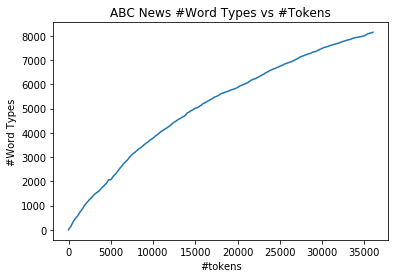

In [36]:
plt.plot(abc_num_tokens, abc_num_types)
plt.xlabel("#tokens")
plt.ylabel("#Word Types")
plt.title("ABC News #Word Types vs #Tokens")

Neither of the two plots plateau as much as expected, but this is likely due to the fact that 100 articles is not enough to get most of the most common words. By article 100, new words are still being found, so while the slope has decreased, it has not fully plateaued. It is interesting that ABC has more word-types than FOX. It also has more tokens which might indicate the articles on ABC are generally a bit longer than those on FOX.

## 6.2

WordCloud for FOX News


(-0.5, 2999.5, 1999.5, -0.5)

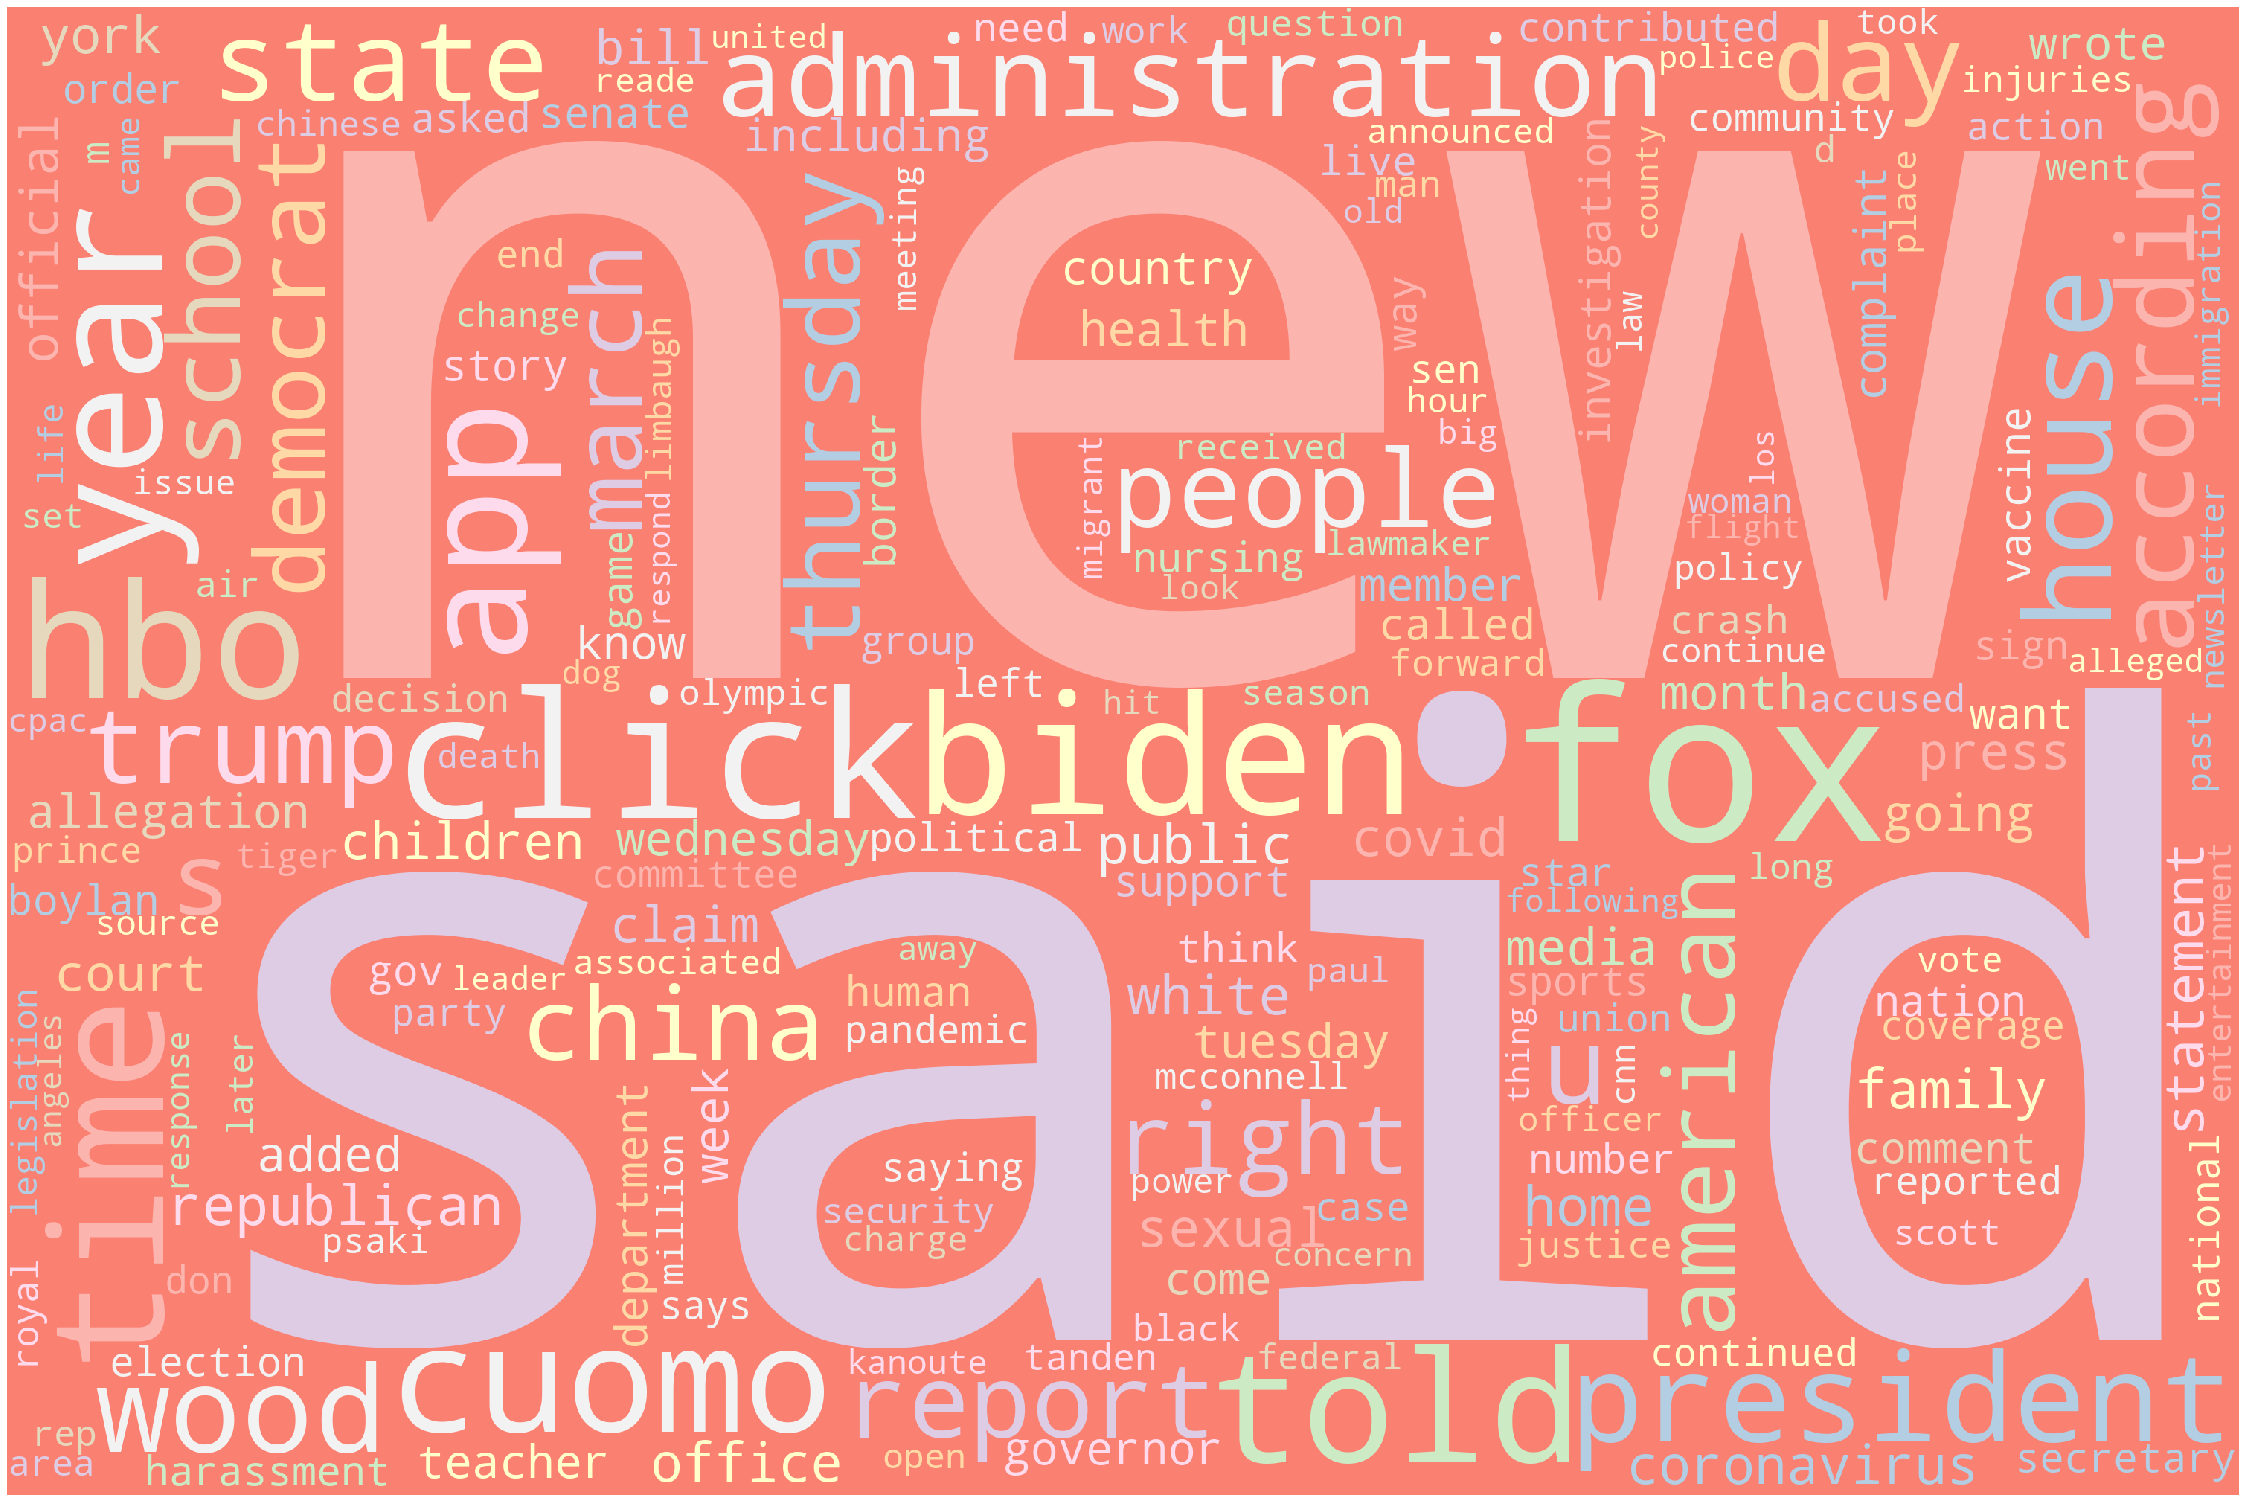

In [38]:
all_words_joined = ' '
fox_word_cloud_text = all_words_joined.join(fox_tokens)


wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,
                      background_color='salmon', colormap='Pastel1',
                      collocations=False).generate(fox_word_cloud_text)

print("WordCloud for FOX News")

plt.figure(figsize=(40, 30))
plt.imshow(wordcloud) 
plt.axis("off")

WordCloud for ABC News


(-0.5, 2999.5, 1999.5, -0.5)

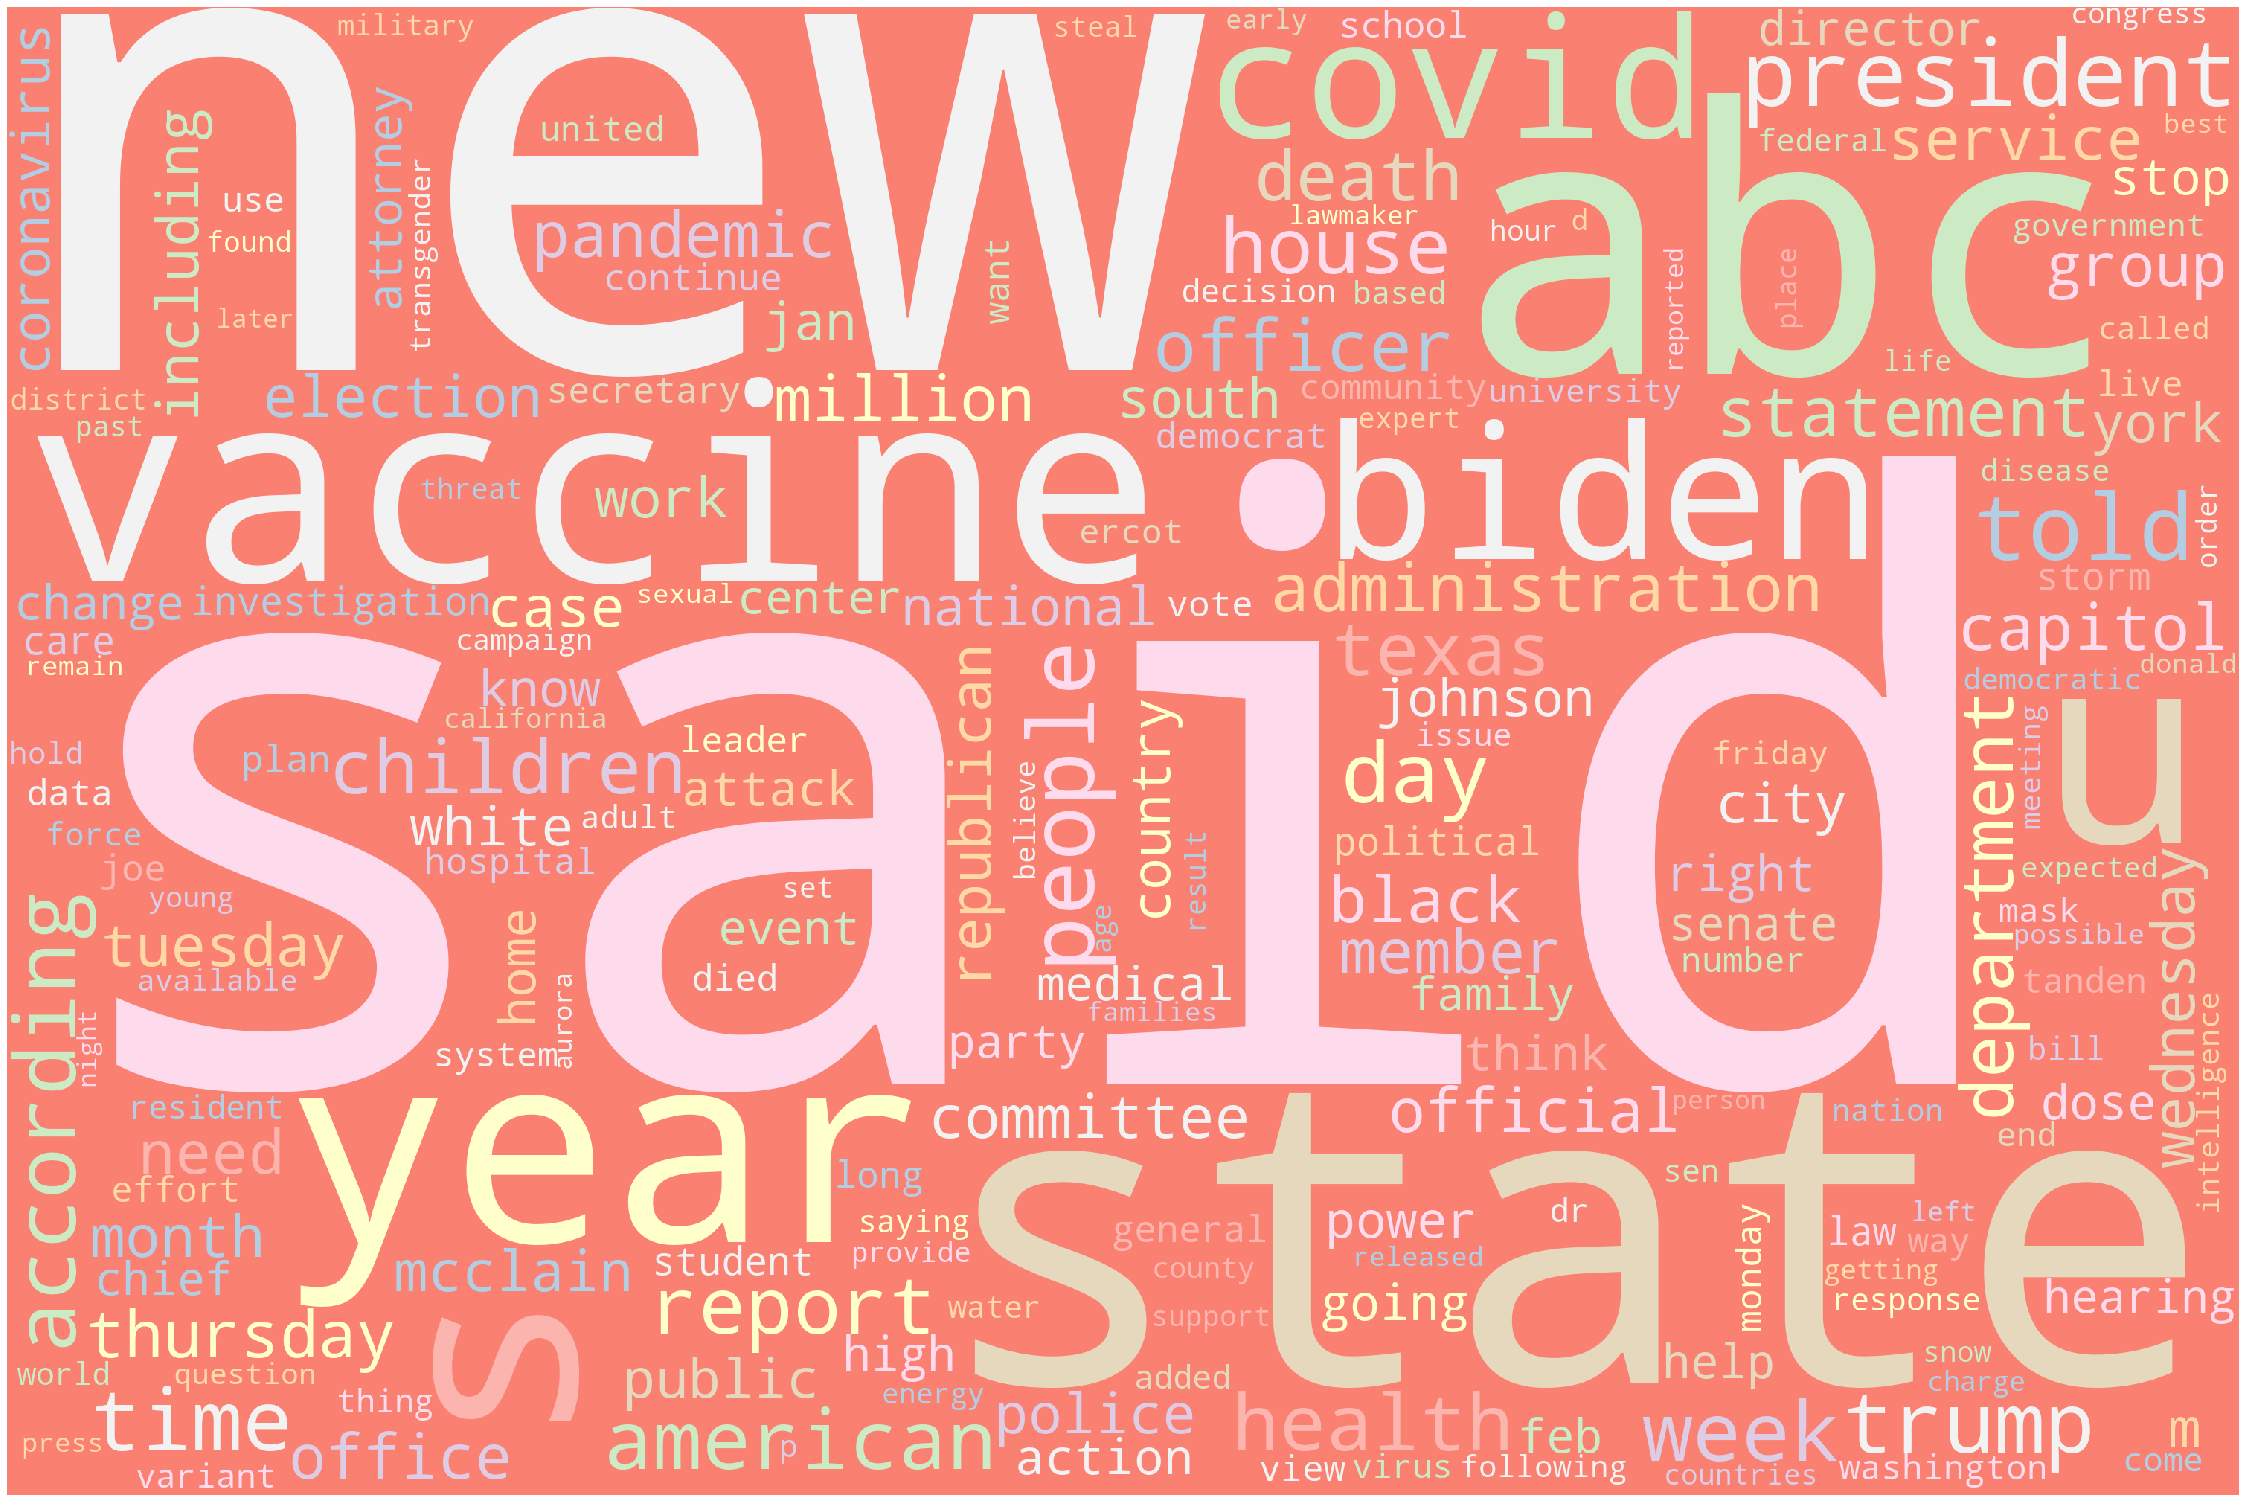

In [39]:
all_words_joined = ' '
abc_word_cloud_text = all_words_joined.join(abc_tokens)


wordcloud = WordCloud(width = 3000, height = 2000, random_state=1,
                      background_color='salmon', colormap='Pastel1',
                      collocations=False).generate(abc_word_cloud_text)

print("WordCloud for ABC News")

plt.figure(figsize=(40, 30))
plt.imshow(wordcloud) 
plt.axis("off")

It is interesting how "Cuomo" a liberal governer is one of the top words on the FOX cloud but not ABC indicating that they're more inclined to report about a his recent scandal than a more liberal news source like ABC.

Both have "said" as the top word which makes sense as they're both news sites and would use that word a lot.

"Trump" is also more prevalent on the FOX wordcloud which is interesting but could be interpreted multiple ways. Either their readers want to hear more about Trump or they're purposely airing more news about him to keep publicity up.